# Intra and inter values from raw data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
from pathlib import Path

In [2]:
downsample_dir = Path(
    "/tscc/projects/ps-epigen/users/biy022/scmethylhic/human_hippocampus/"
    "snm3c/Combined/hic/downsampled/"
)
tad_dir = Path("/tscc/projects/ps-renlab2/sel041/scmethylhic/human_hippocampus/concat/hic/celltype/")

In [3]:
age_colors = {
    "20-40": "#1B9E77",
    "40-60": "#CCCD66",
    "60-80": "#7570B3",
    "80-100": "#E7298A"
}
comparison_colors = {
    "2vs1": "#CCCD66",
    "3vs1": "#7570B3",
    "4vs1": "#E7298A"
}

## Test with Oligo

In [4]:
subclass = "Oligo"

In [5]:
curr_datasets = xr.open_dataset(
    downsample_dir / subclass / "domain" / f"{subclass}_raw_25k.insulation.nc")

In [6]:
curr_pd_intra = pd.DataFrame(
    np.transpose(curr_datasets["__xarray_dataarray_variable__"].loc[:,:,"intra"].values),
    columns=["20-40", "40-60", "60-80", "80-100"]
)

In [7]:
curr_pd_inter = pd.DataFrame(
    np.transpose(curr_datasets["__xarray_dataarray_variable__"].loc[:,:,"inter"].values),
    columns=["20-40", "40-60", "60-80", "80-100"]
)

In [8]:
curr_pd_ratio = curr_pd_intra / (curr_pd_inter + curr_pd_intra)
curr_pd_ratio = curr_pd_ratio[~curr_pd_ratio.isin([np.inf, np.nan]).any(axis=1)]

In [9]:
curr_pd_intra_plot = pd.melt(curr_pd_intra, var_name="age", value_name="intra")
curr_pd_inter_plot = pd.melt(curr_pd_inter, var_name="age", value_name="inter")
curr_pd_ratio_plot = pd.melt(curr_pd_ratio, var_name="age", value_name="ratio")

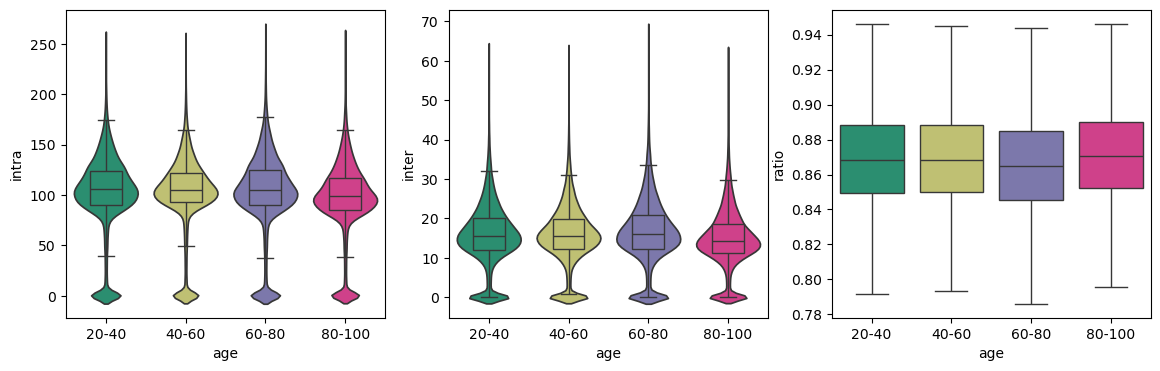

In [10]:
fig, axs = plt.subplots(1, 3)
fig.set_figheight(4)
fig.set_figwidth(14)

sns.violinplot(curr_pd_intra_plot, x="age", y="intra", hue="age", inner=None, ax=axs[0], palette=age_colors);
sns.boxplot(
    curr_pd_intra_plot, x="age", y="intra", hue="age", ax=axs[0], 
    palette=age_colors, width=0.4, showfliers=False);
sns.violinplot(curr_pd_inter_plot, x="age", y="inter", hue="age", inner=None, ax=axs[1], palette=age_colors);
sns.boxplot(
    curr_pd_inter_plot, x="age", y="inter", hue="age", ax=axs[1], 
    palette=age_colors, width=0.4, showfliers=False);
sns.boxplot(
    curr_pd_ratio_plot, x="age", y="ratio", hue="age", ax=axs[2], 
    palette=age_colors, showfliers=False);

In [11]:
curr_tad = pd.read_csv(
    tad_dir / f"human_aging_{subclass}_psueobulk_domain_filtered.bed",
    header=0, sep=","
)

In [12]:
A = pd.DataFrame({
    "chrom": curr_datasets.bin_chrom,
    "value": curr_datasets.bin_start
})
A["index"] = A.index

In [13]:
B = pd.melt(curr_tad, id_vars="chrom")[["chrom", "value"]]

In [14]:
bd_indices = A.merge(B, on=["chrom", "value"])["index"]

In [15]:
curr_pd_intra = pd.DataFrame(
    np.transpose(curr_datasets["__xarray_dataarray_variable__"].loc[:,bd_indices.to_numpy(),"intra"].values),
    columns=["20-40", "40-60", "60-80", "80-100"]
)

In [16]:
curr_pd_inter = pd.DataFrame(
    np.transpose(curr_datasets["__xarray_dataarray_variable__"].loc[:,bd_indices.to_numpy(),"inter"].values),
    columns=["20-40", "40-60", "60-80", "80-100"]
)

In [17]:
curr_pd_ratio = curr_pd_intra / (curr_pd_inter + curr_pd_intra)
curr_pd_ratio = curr_pd_ratio[~curr_pd_ratio.isin([np.inf, np.nan]).any(axis=1)]

In [18]:
curr_pd_intra_plot = pd.melt(curr_pd_intra, var_name="age", value_name="intra")
curr_pd_inter_plot = pd.melt(curr_pd_inter, var_name="age", value_name="inter")
curr_pd_ratio_plot = pd.melt(curr_pd_ratio, var_name="age", value_name="ratio")

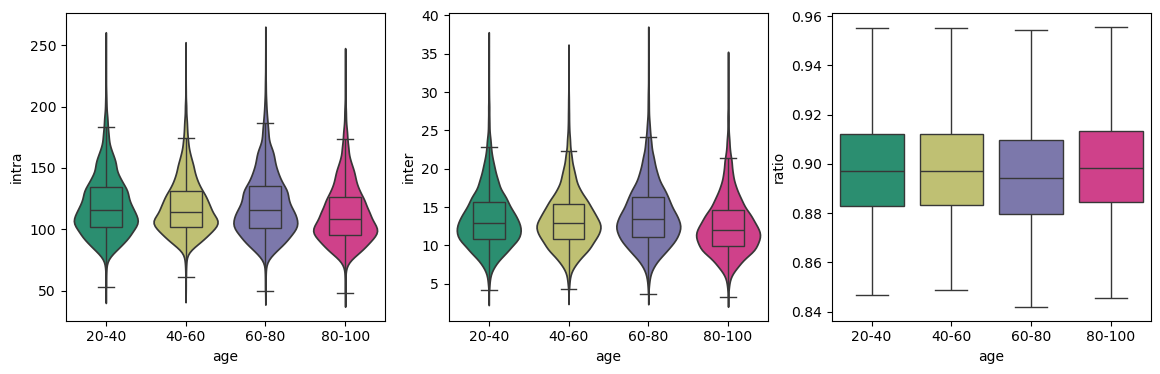

In [19]:
fig, axs = plt.subplots(1, 3)
fig.set_figheight(4)
fig.set_figwidth(14)

sns.violinplot(curr_pd_intra_plot, x="age", y="intra", hue="age", inner=None, ax=axs[0], palette=age_colors);
sns.boxplot(
    curr_pd_intra_plot, x="age", y="intra", hue="age", ax=axs[0], 
    palette=age_colors, width=0.4, showfliers=False);
sns.violinplot(curr_pd_inter_plot, x="age", y="inter", hue="age", inner=None, ax=axs[1], palette=age_colors);
sns.boxplot(
    curr_pd_inter_plot, x="age", y="inter", hue="age", ax=axs[1], 
    palette=age_colors, width=0.4, showfliers=False);
sns.boxplot(
    curr_pd_ratio_plot, x="age", y="ratio", hue="age", ax=axs[2], 
    palette=age_colors, showfliers=False);

## Write a function

In [28]:
def plot_intra_inter(subclass):

    curr_datasets = xr.open_dataset(
        downsample_dir / subclass / "domain" / f"{subclass}_raw_25k.insulation.nc")
    curr_pd_intra = pd.DataFrame(
        np.transpose(curr_datasets["__xarray_dataarray_variable__"].loc[:,:,"intra"].values),
        columns=["20-40", "40-60", "60-80", "80-100"]
    )
    curr_pd_inter = pd.DataFrame(
        np.transpose(curr_datasets["__xarray_dataarray_variable__"].loc[:,:,"inter"].values),
        columns=["20-40", "40-60", "60-80", "80-100"]
    )
    curr_pd_ratio = curr_pd_intra / (curr_pd_inter + curr_pd_intra)
    curr_pd_ratio = curr_pd_ratio[~curr_pd_ratio.isin([np.inf, np.nan]).any(axis=1)]
    curr_pd_intra_plot = pd.melt(curr_pd_intra, var_name="age", value_name="intra")
    curr_pd_inter_plot = pd.melt(curr_pd_inter, var_name="age", value_name="inter")
    curr_pd_ratio_plot = pd.melt(curr_pd_ratio, var_name="age", value_name="ratio")

    curr_tad = pd.read_csv(
        tad_dir / f"human_aging_{subclass}_psueobulk_domain_filtered.bed",
        header=0, sep=","
    )
    A = pd.DataFrame({
        "chrom": curr_datasets.bin_chrom,
        "value": curr_datasets.bin_start
    })
    A["index"] = A.index
    B = pd.melt(curr_tad, id_vars="chrom")[["chrom", "value"]]
    bd_indices = A.merge(B, on=["chrom", "value"])["index"]

    curr_pd_intra_bd = pd.DataFrame(
        np.transpose(curr_datasets["__xarray_dataarray_variable__"].loc[:,bd_indices.to_numpy(),"intra"].values),
        columns=["20-40", "40-60", "60-80", "80-100"]
    )
    curr_pd_inter_bd = pd.DataFrame(
        np.transpose(curr_datasets["__xarray_dataarray_variable__"].loc[:,bd_indices.to_numpy(),"inter"].values),
        columns=["20-40", "40-60", "60-80", "80-100"]
    )
    curr_pd_ratio_bd = curr_pd_intra_bd / (curr_pd_inter_bd + curr_pd_intra_bd)
    curr_pd_ratio_bd = curr_pd_ratio_bd[~curr_pd_ratio_bd.isin([np.inf, np.nan]).any(axis=1)]
    curr_pd_intra_bd_plot = pd.melt(curr_pd_intra_bd, var_name="age", value_name="intra")
    curr_pd_inter_bd_plot = pd.melt(curr_pd_inter_bd, var_name="age", value_name="inter")
    curr_pd_ratio_bd_plot = pd.melt(curr_pd_ratio_bd, var_name="age", value_name="ratio")

    fig, axs = plt.subplots(2, 3, sharex=True, layout="constrained")
    fig.set_figheight(8)
    fig.set_figwidth(14)
    
    sns.violinplot(curr_pd_intra_plot, x="age", y="intra", hue="age", inner=None, ax=axs[0, 0], palette=age_colors);
    sns.boxplot(
        curr_pd_intra_plot, x="age", y="intra", hue="age", ax=axs[0, 0], 
        palette=age_colors, width=0.4, showfliers=False);
    axs[0, 0].set_title("Intra")
    sns.violinplot(curr_pd_inter_plot, x="age", y="inter", hue="age", inner=None, ax=axs[0, 1], palette=age_colors);
    sns.boxplot(
        curr_pd_inter_plot, x="age", y="inter", hue="age", ax=axs[0, 1], 
        palette=age_colors, width=0.4, showfliers=False);
    axs[0, 1].set_title("Inter")
    sns.boxplot(
        curr_pd_ratio_plot, x="age", y="ratio", hue="age", ax=axs[0, 2], 
        palette=age_colors, showfliers=False);
    axs[0, 2].set_title("Intra / Inter")

    sns.violinplot(curr_pd_intra_bd_plot, x="age", y="intra", hue="age", inner=None, ax=axs[1, 0], palette=age_colors);
    sns.boxplot(
        curr_pd_intra_bd_plot, x="age", y="intra", hue="age", ax=axs[1, 0], 
        palette=age_colors, width=0.4, showfliers=False);
    axs[1, 0].set_title("Intra")
    sns.violinplot(curr_pd_inter_bd_plot, x="age", y="inter", hue="age", inner=None, ax=axs[1, 1], palette=age_colors);
    sns.boxplot(
        curr_pd_inter_bd_plot, x="age", y="inter", hue="age", ax=axs[1, 1], 
        palette=age_colors, width=0.4, showfliers=False);
    axs[1, 1].set_title("Inter")
    sns.boxplot(
        curr_pd_ratio_bd_plot, x="age", y="ratio", hue="age", ax=axs[1, 2], 
        palette=age_colors, showfliers=False);
    axs[1, 2].set_title("Intra / Inter")

## Oligo

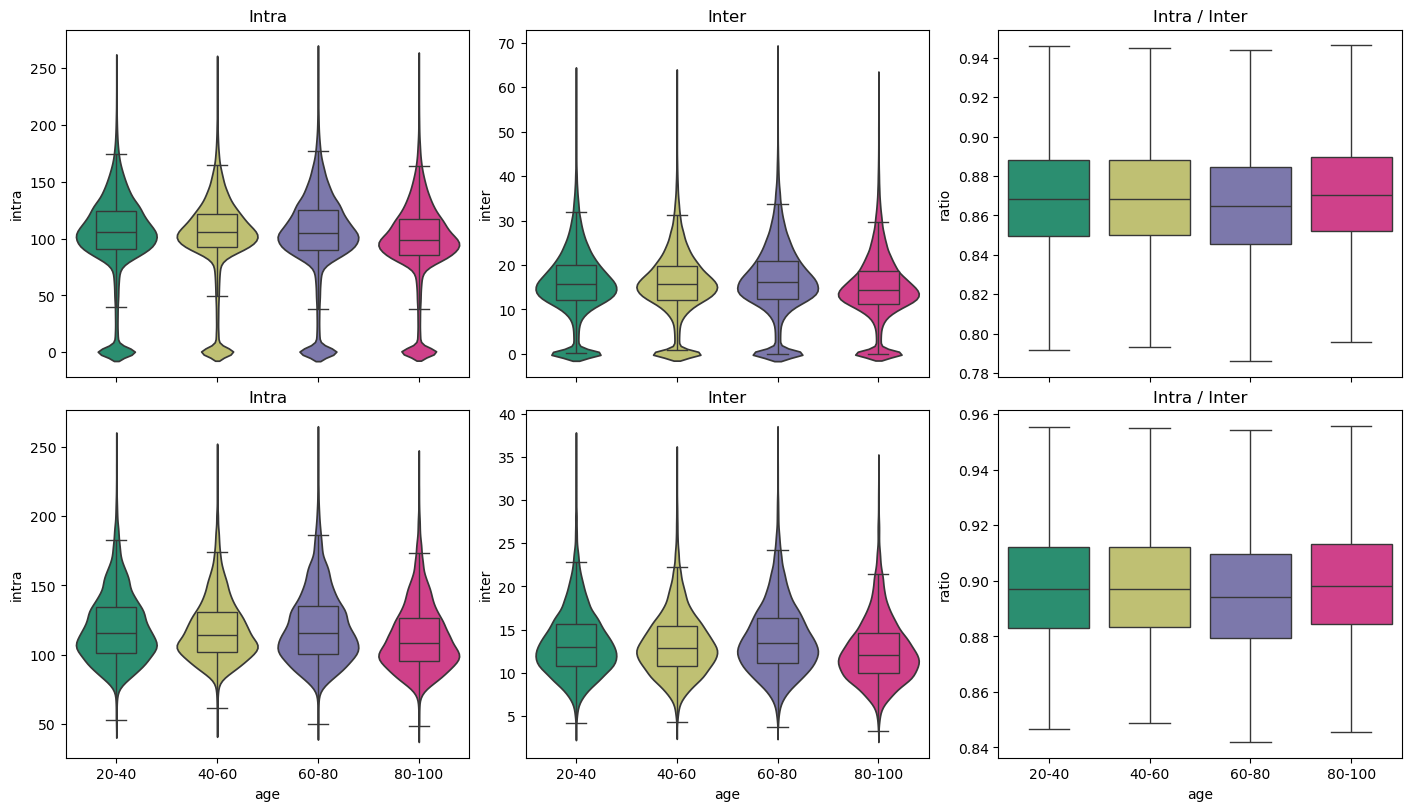

In [30]:
plot_intra_inter("Oligo")

## Astro

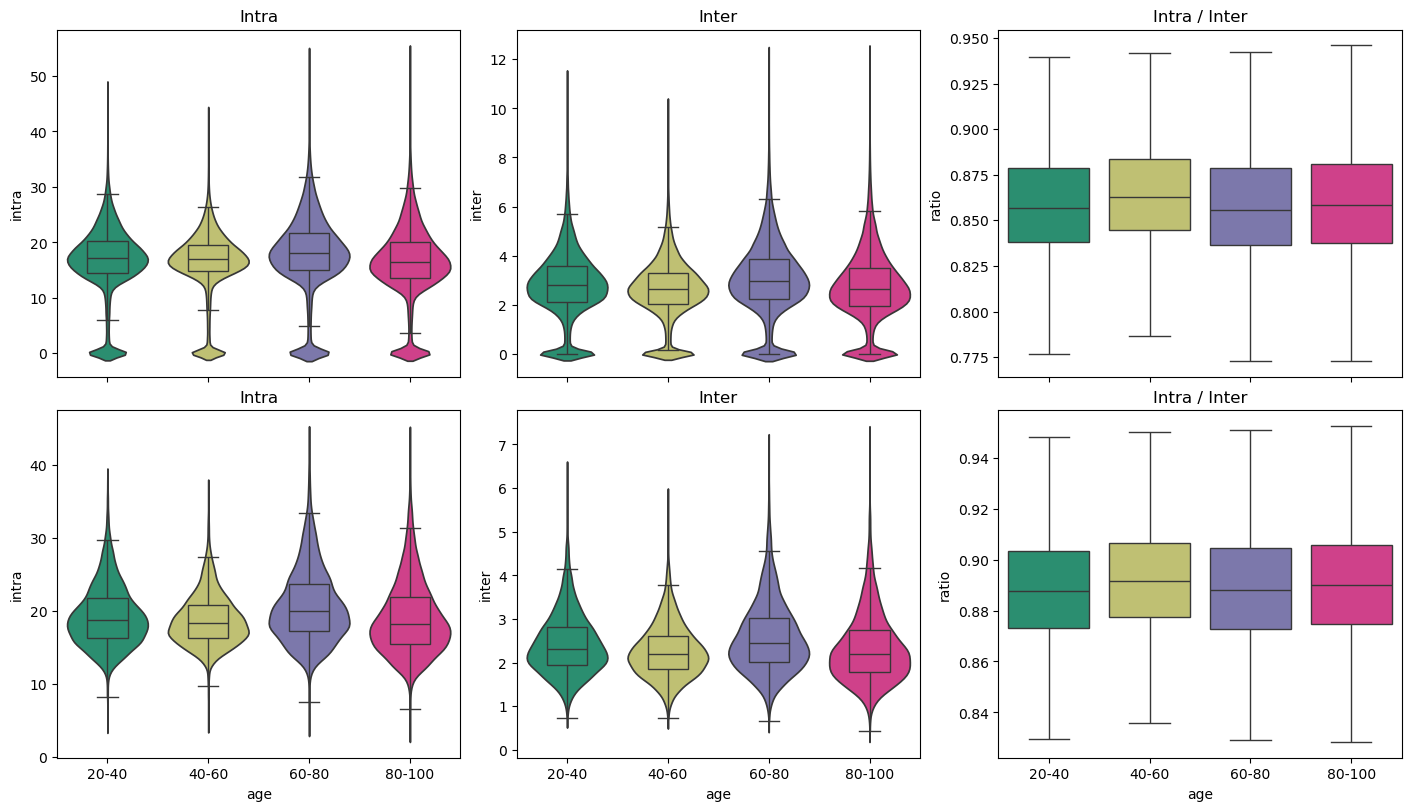

In [29]:
plot_intra_inter("Astro")

## Micro

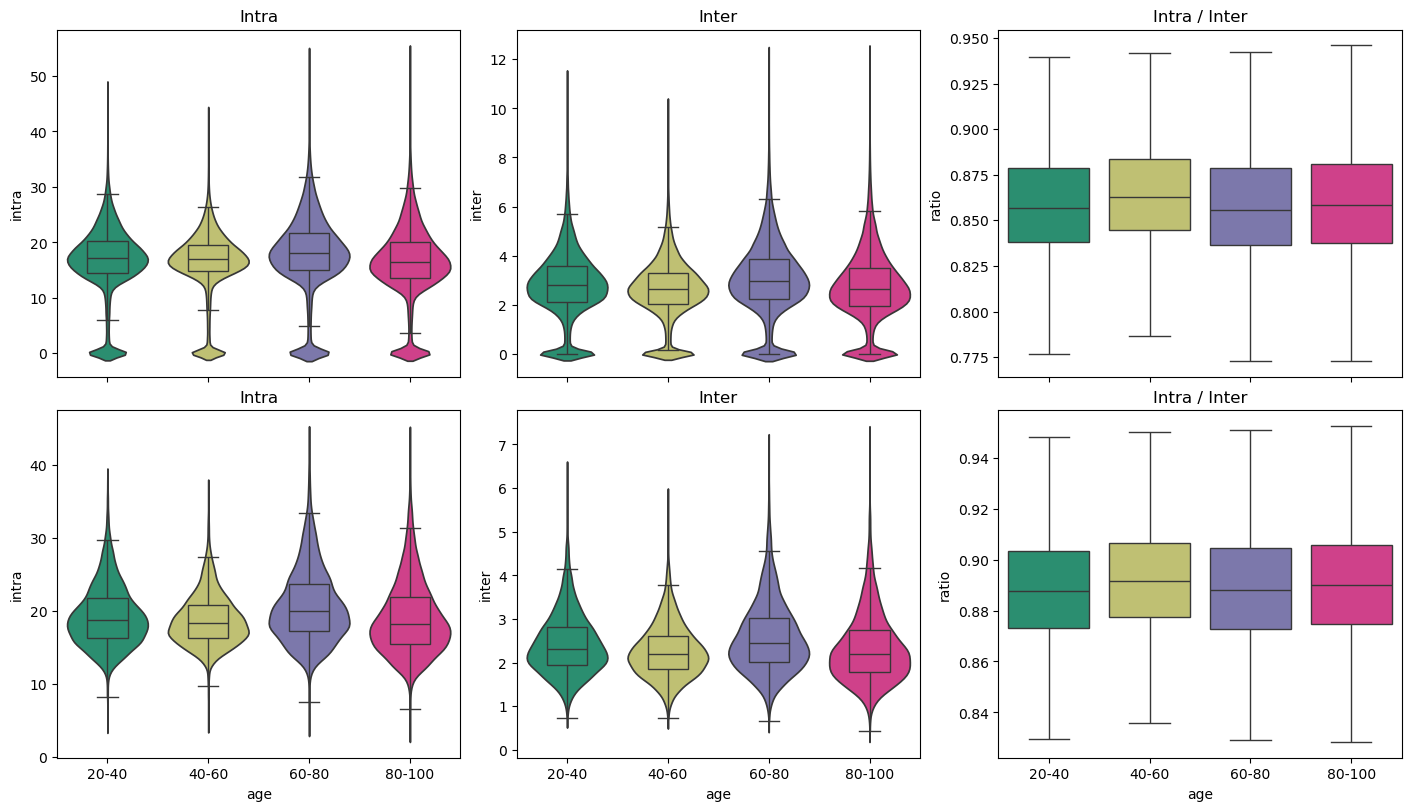

In [31]:
plot_intra_inter("Astro")

## Endo_VLMC

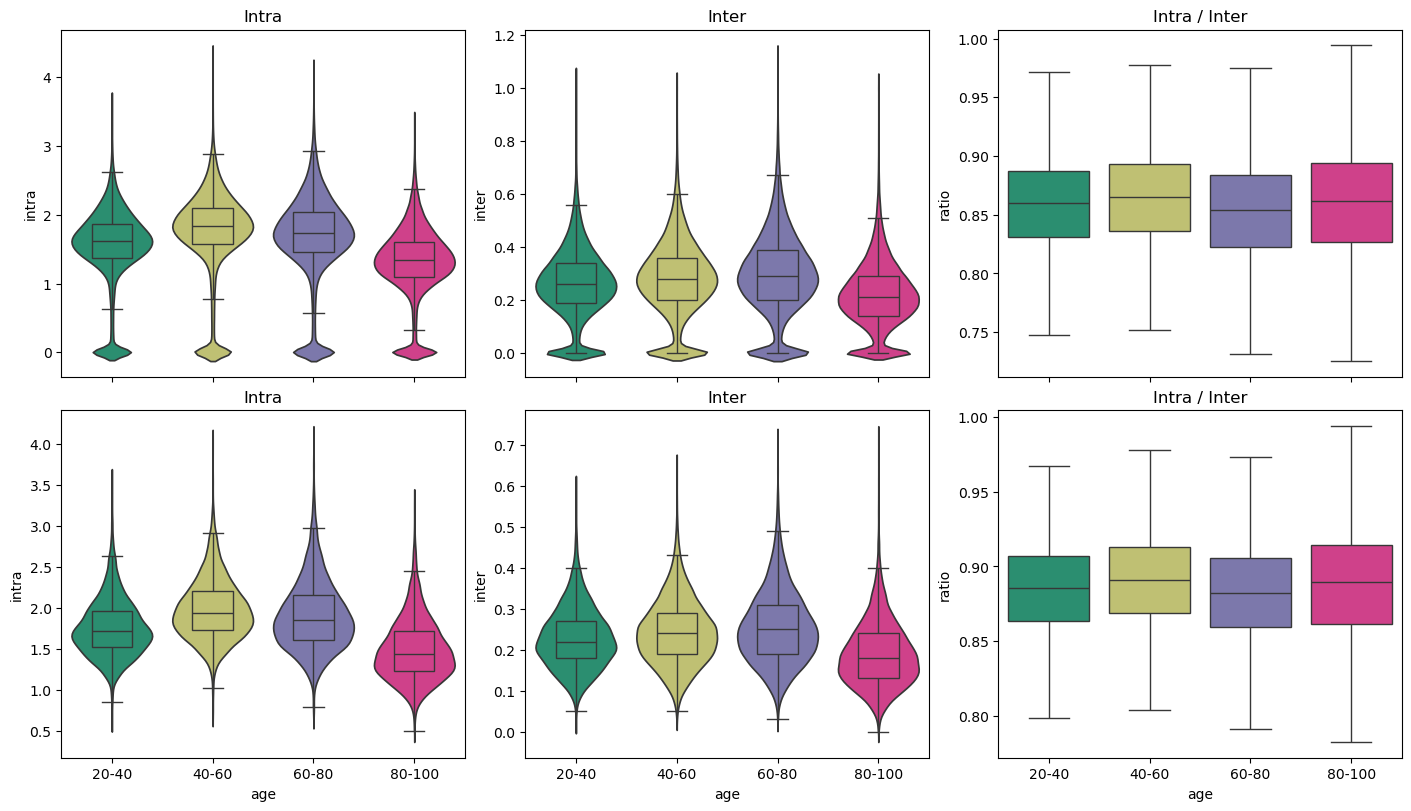

In [32]:
plot_intra_inter("Endo_VLMC")

## OPC

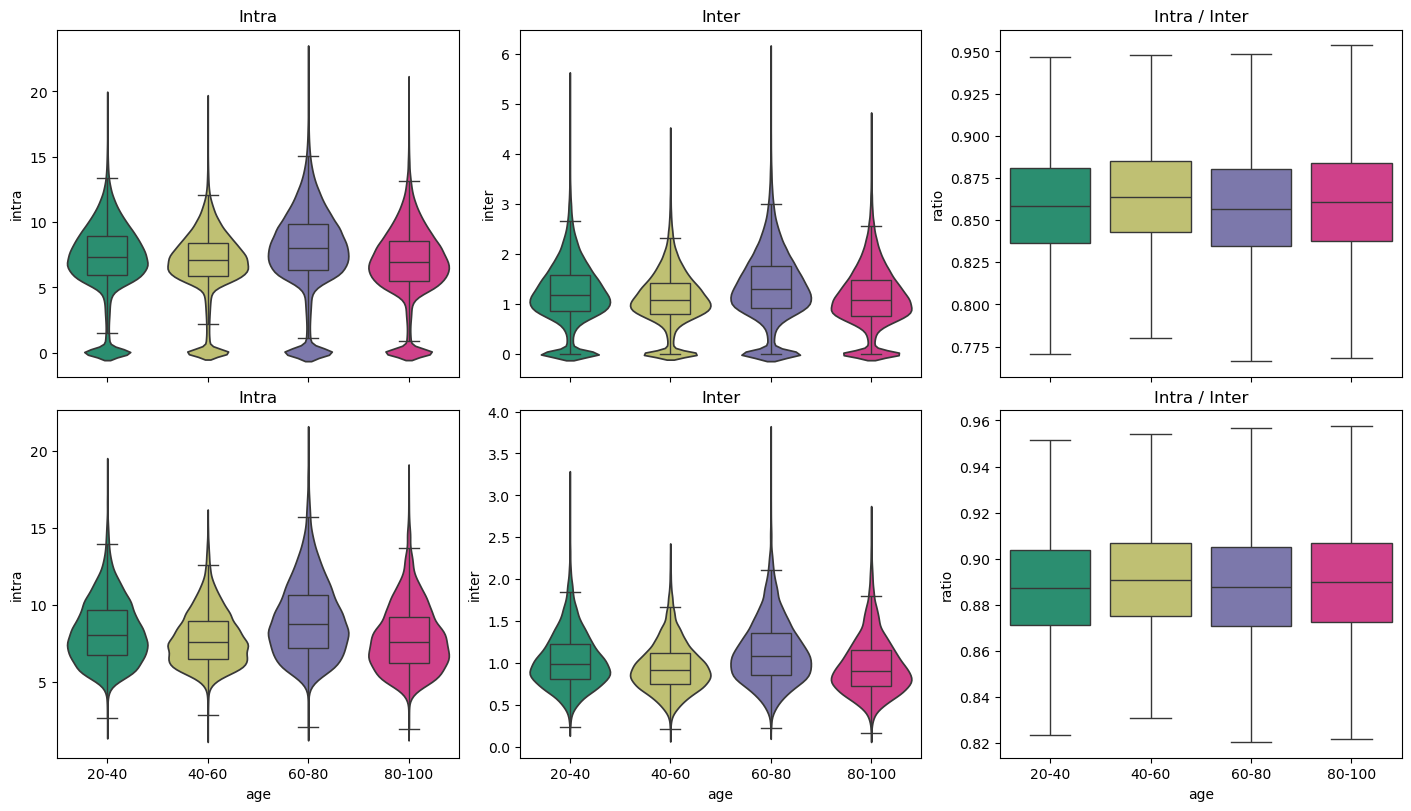

In [33]:
plot_intra_inter("OPC")

## ExcNeurons

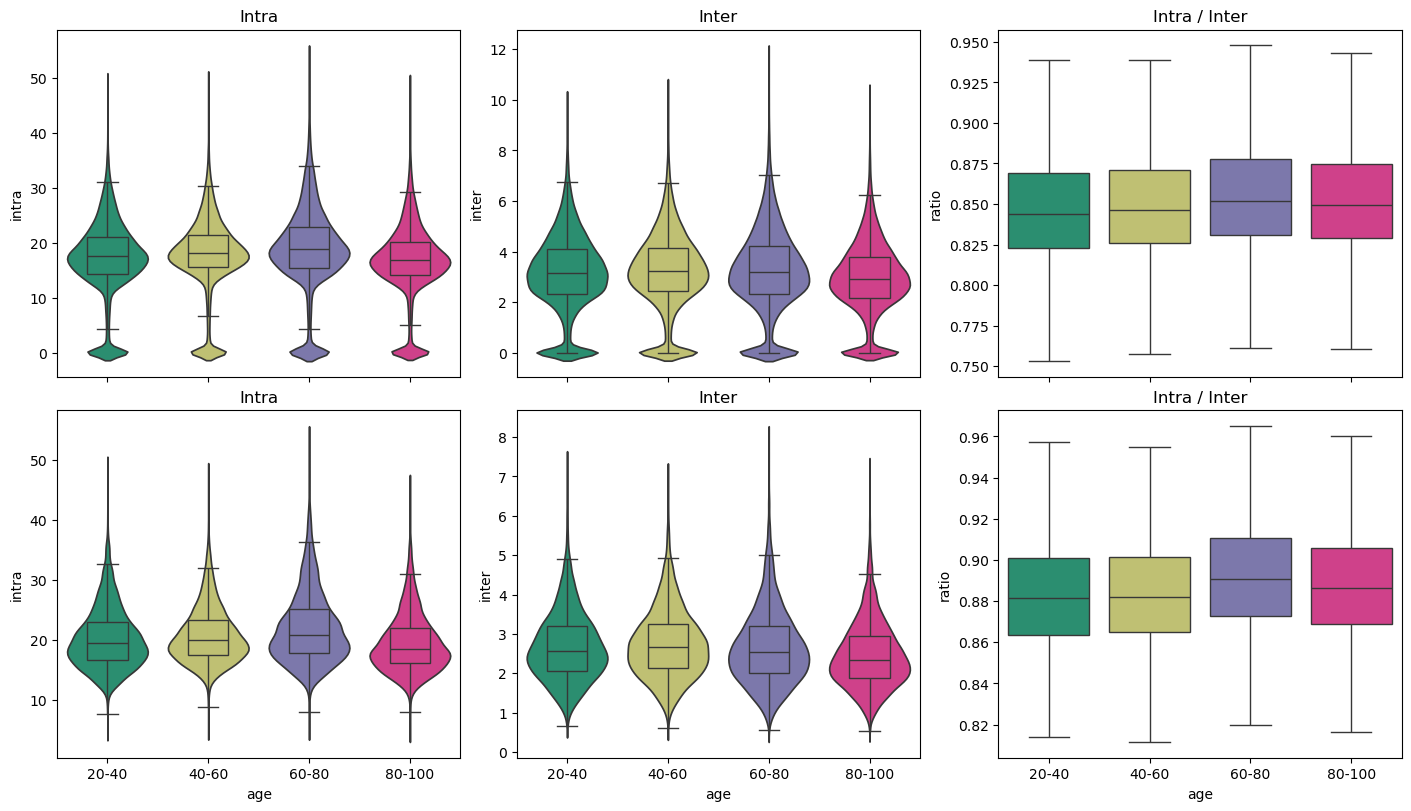

In [34]:
plot_intra_inter("ExcNeurons")

## InhNeurons

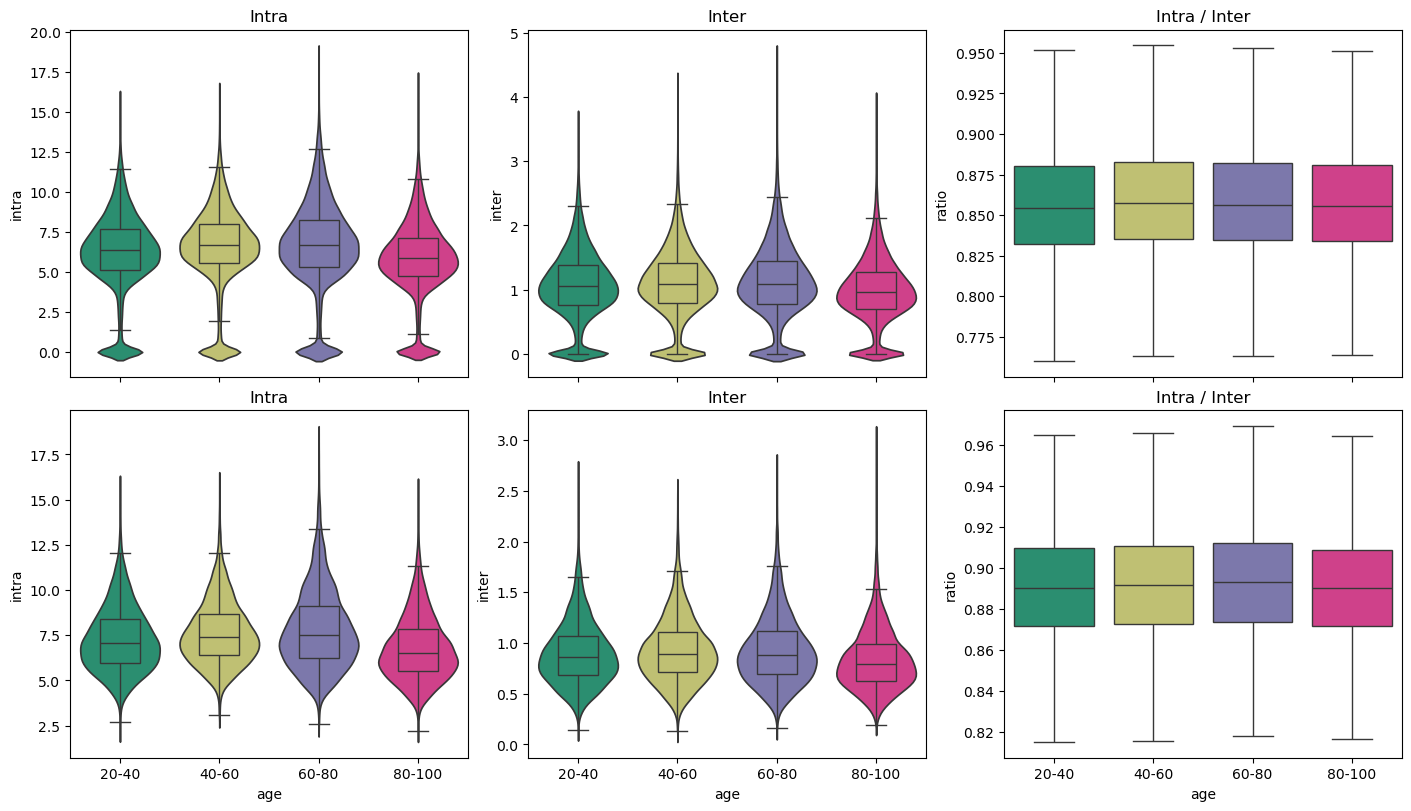

In [37]:
plot_intra_inter("InhNeurons")

## CA

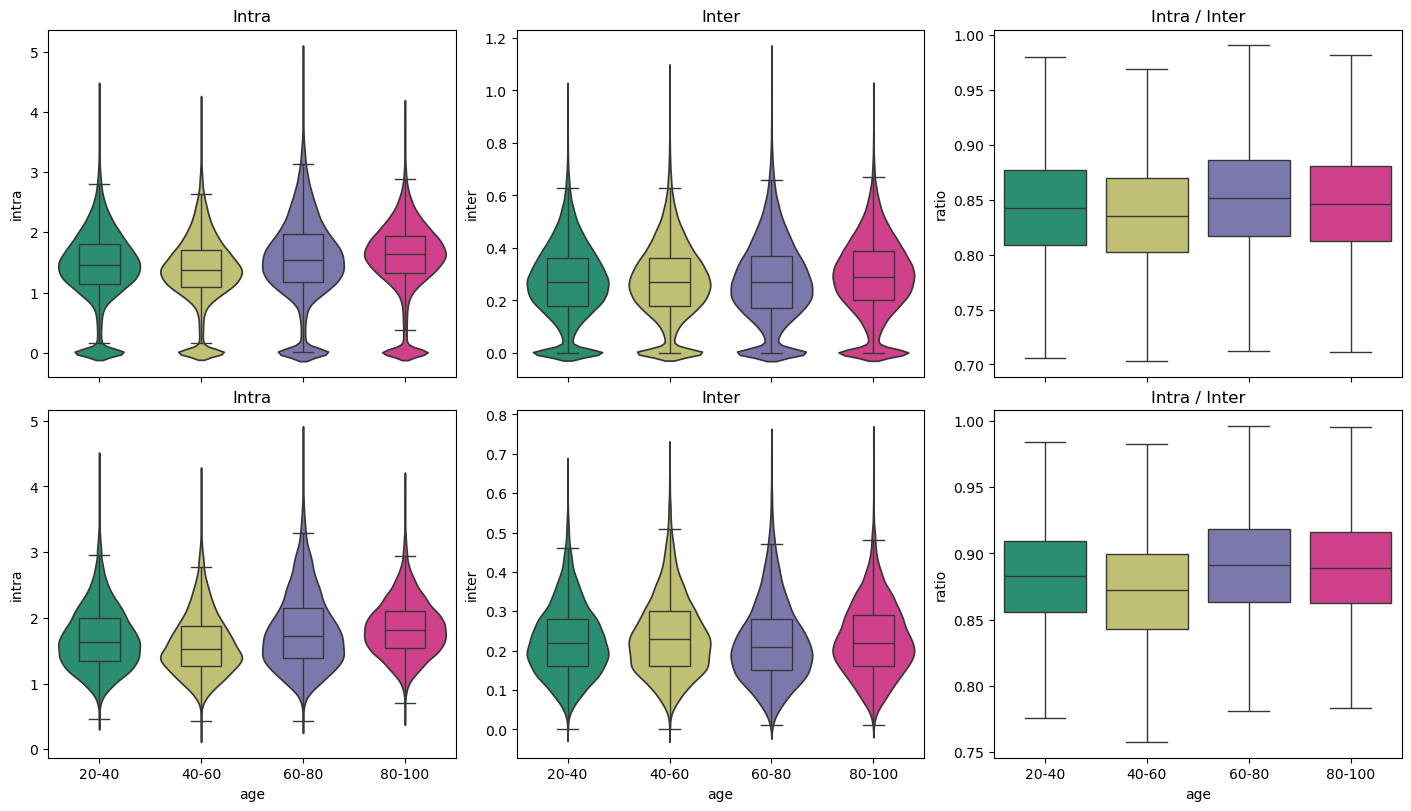

In [38]:
plot_intra_inter("CA")

## DG

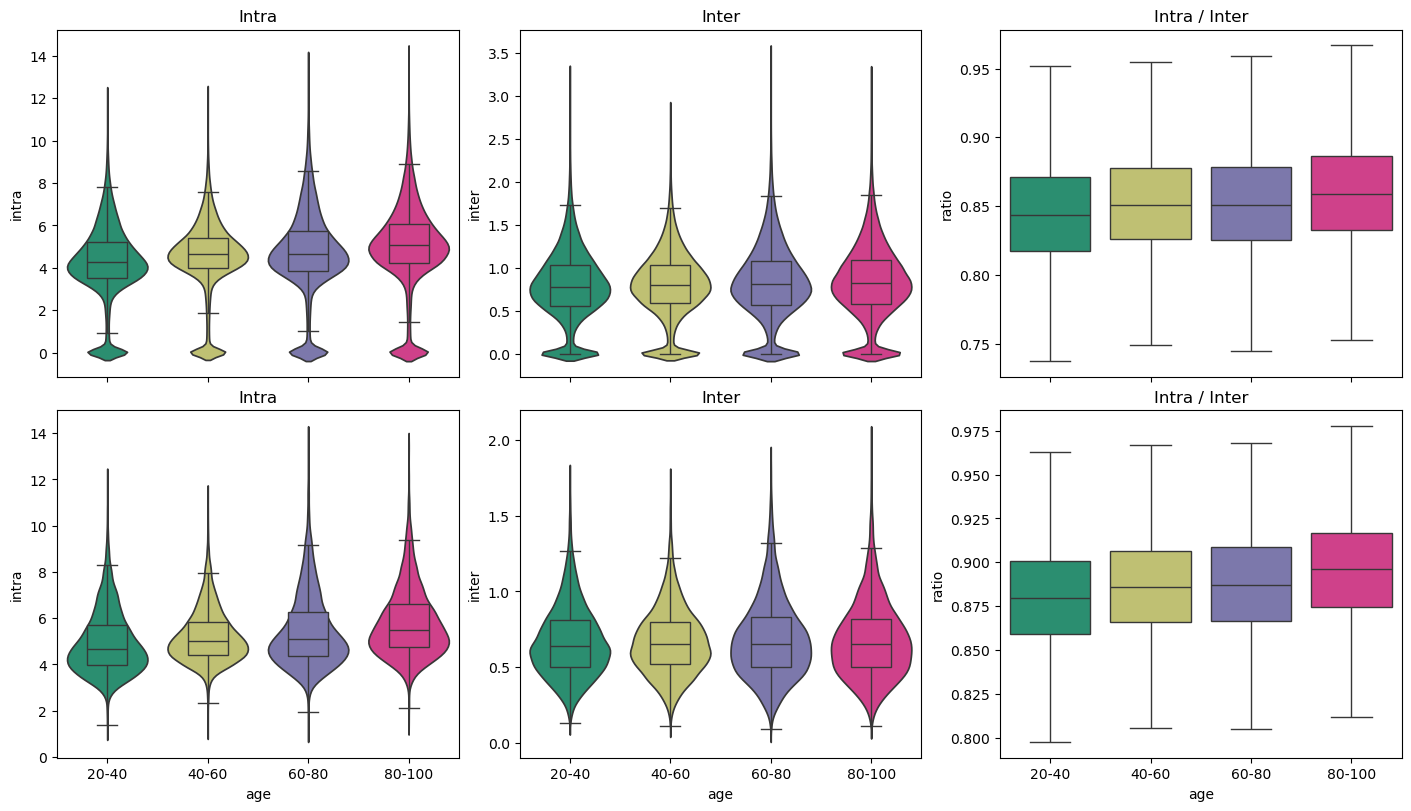

In [39]:
plot_intra_inter("DG")

## SUB

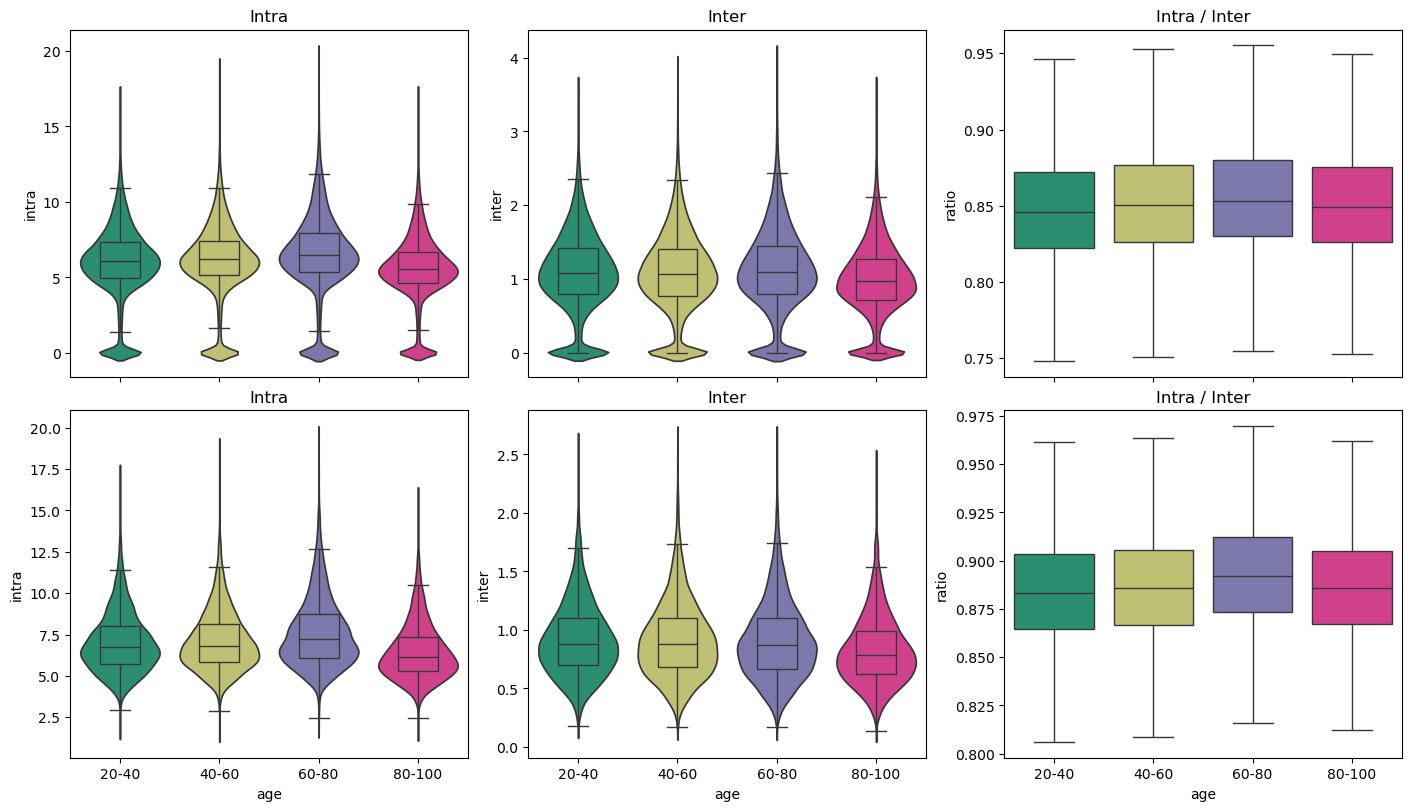

In [40]:
plot_intra_inter("SUB")

## NR2F2-LAMP5

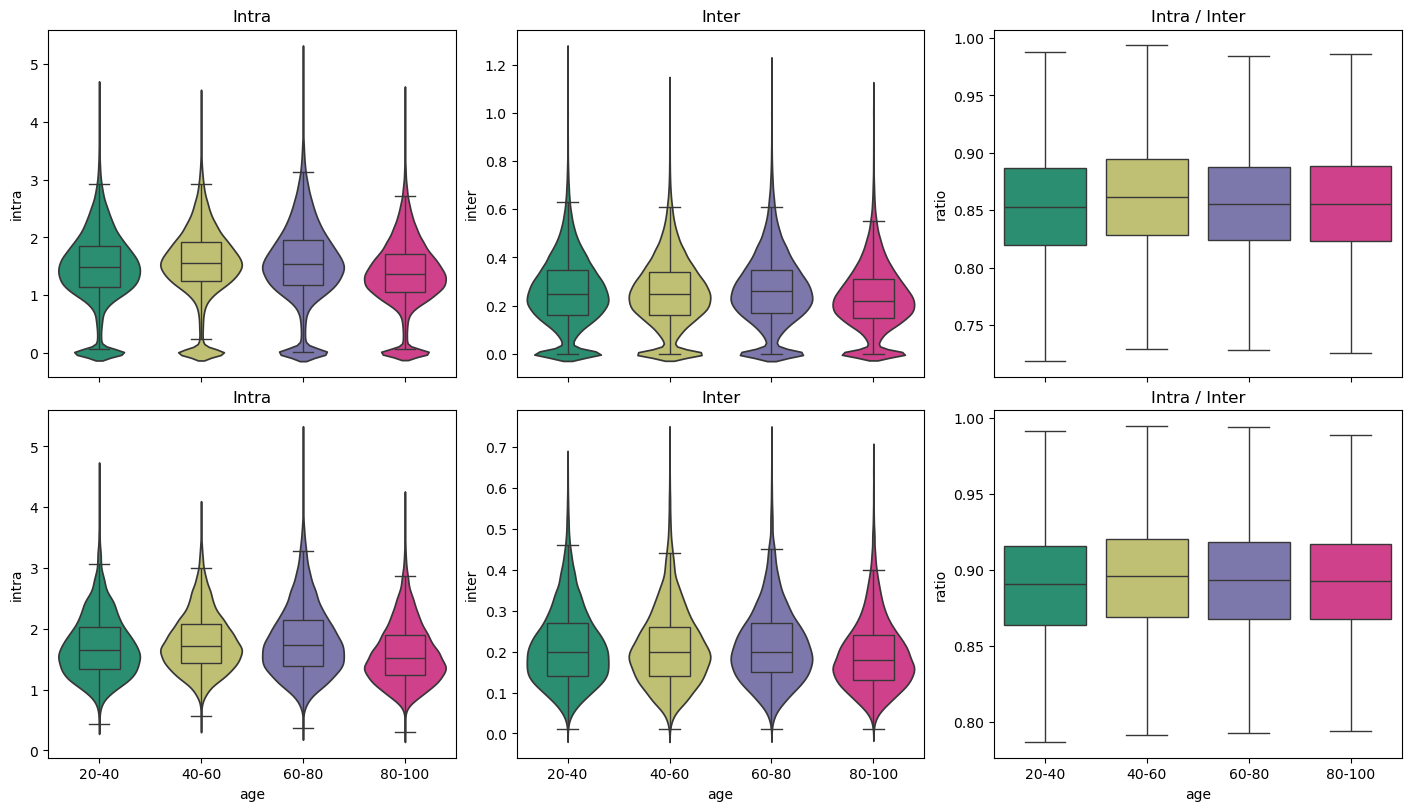

In [41]:
plot_intra_inter("NR2F2-LAMP5")

## PVALB

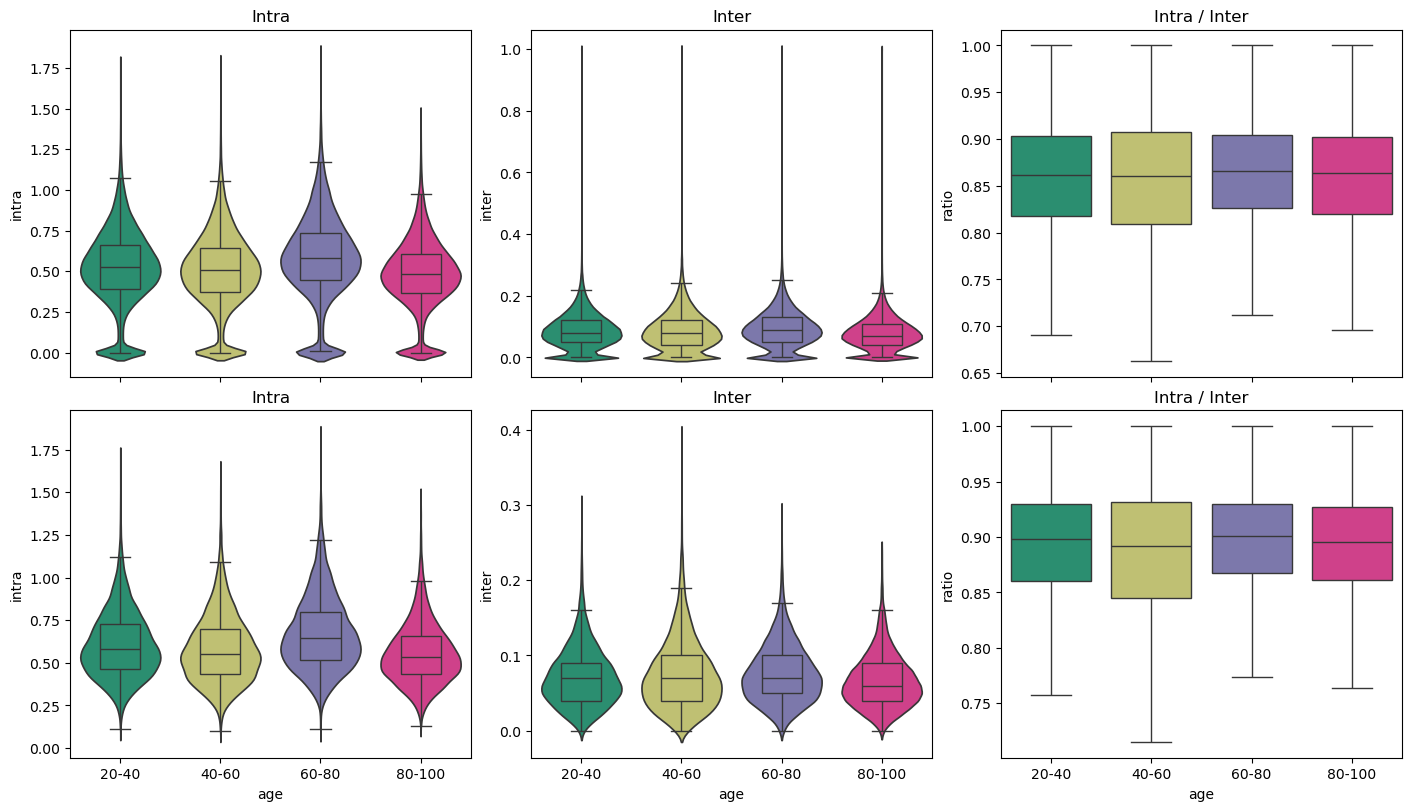

In [42]:
plot_intra_inter("PVALB")

## VIP

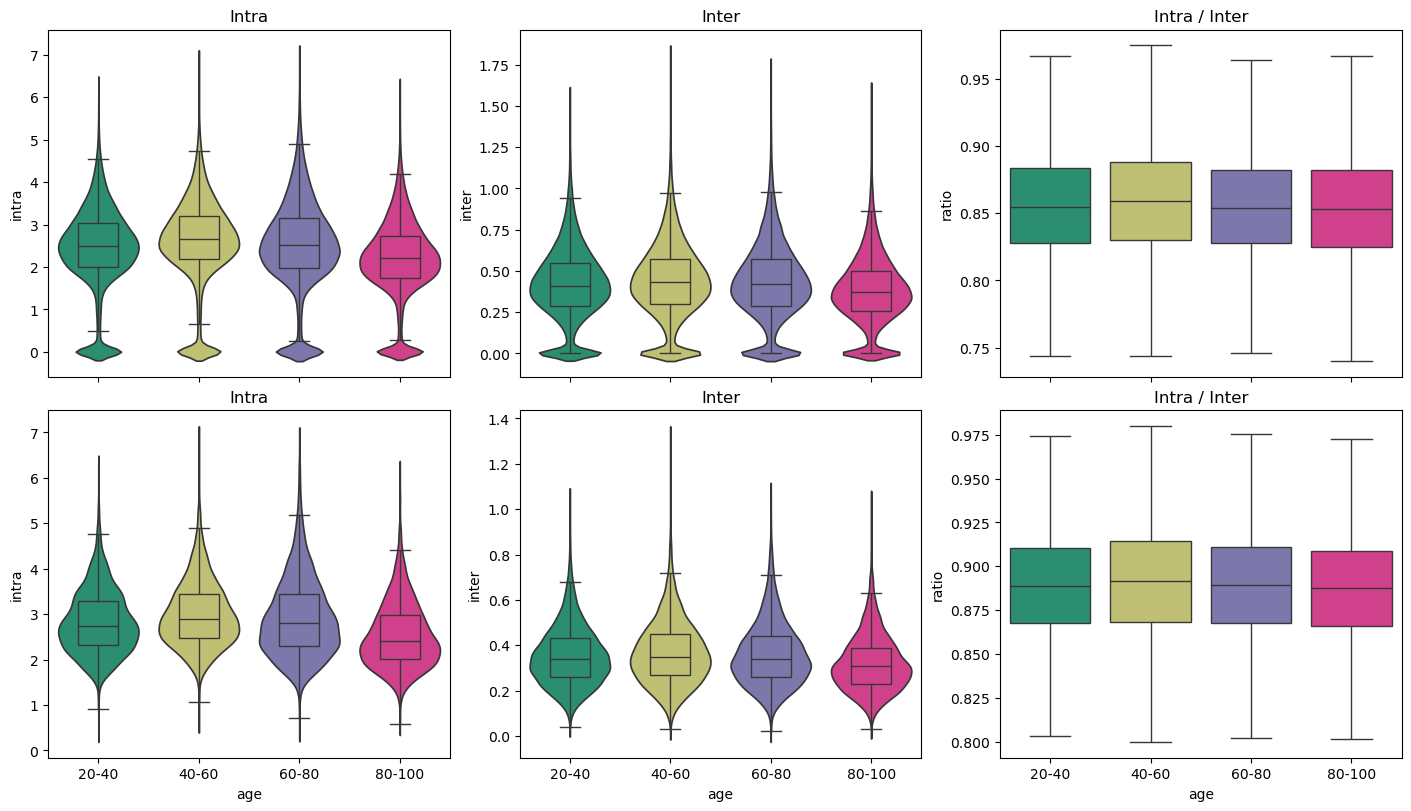

In [43]:
plot_intra_inter("VIP")

## SST

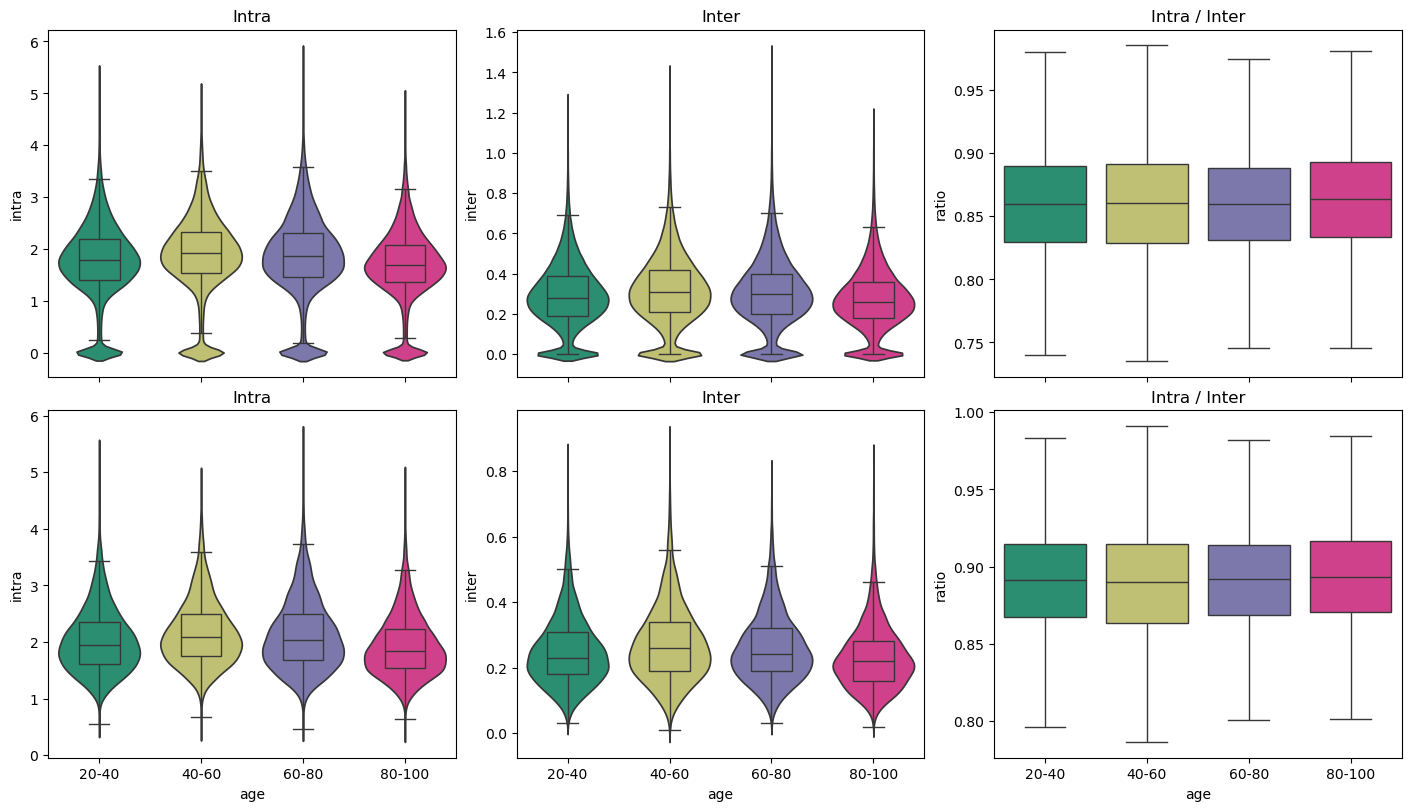

In [44]:
plot_intra_inter("SST")